<a href="https://colab.research.google.com/github/ocrobotix/sandbox/blob/main/NN_in_13_lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 https://iamtrask.github.io/2015/07/27/python-network-part2/   
 https://www.robertsdionne.com/bouncingball/    
 https://cs.stanford.edu/people/karpathy/convnetjs/demo/trainers.html


In [5]:
#!pip install numpy
#!pip install matplotlib

In [13]:
import numpy as np

X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y = np.array([[0,1,1,0]]).T
alpha, hidden_dim = (0.5, 4)

synapse_0 = 2 * np.random.random((3, hidden_dim)) - 1
synapse_1 = 2 * np.random.random((hidden_dim, 1)) - 1

for j in range(60000):
    # Forward pass
    layer_1 = 1 / (1 + np.exp(-(np.dot(X, synapse_0))))  # Hidden layer
    layer_2 = 1 / (1 + np.exp(-(np.dot(layer_1, synapse_1))))  # Output layer

    # Backpropagation
    layer_2_delta = (layer_2 - y) * (layer_2 * (1 - layer_2))
    layer_1_delta = layer_2_delta.dot(synapse_1.T) * (layer_1 * (1 - layer_1))

    # Update weights
    synapse_1 -= alpha * layer_1.T.dot(layer_2_delta)
    synapse_0 -= alpha * X.T.dot(layer_1_delta)

    # Print loss
    if j % 10000 == 0:
        loss = np.mean(np.square(layer_2 - y))
        print(f"Iteration {j}, Loss: {loss:.6f}")


Iteration 0, Loss: 0.330137
Iteration 10000, Loss: 0.000221
Iteration 20000, Loss: 0.000098
Iteration 30000, Loss: 0.000062
Iteration 40000, Loss: 0.000045
Iteration 50000, Loss: 0.000035


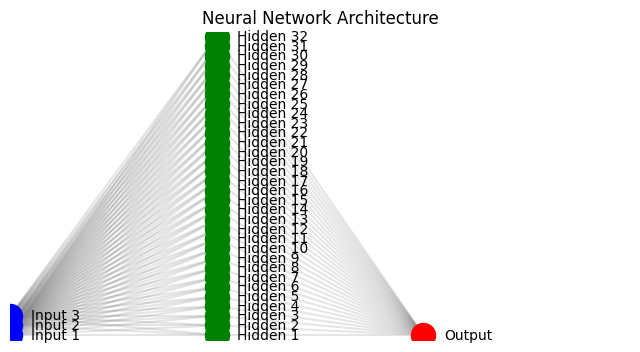

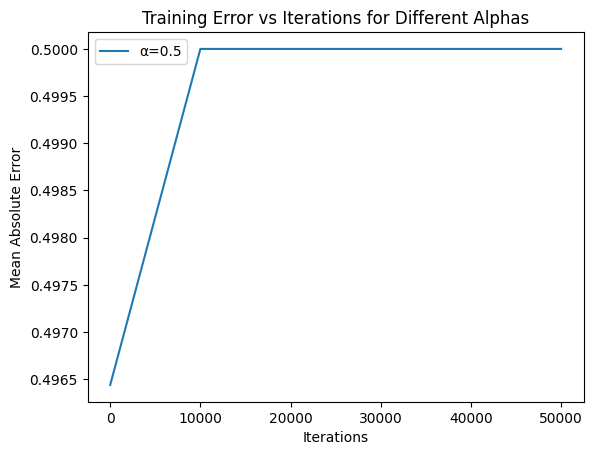

In [14]:
# 1. Network architecture diagram
draw_neural_net(3, hiddenSize, 1)  # Draws the network structure

# 2. Training error plot
plt.plot(range(0, 60000, 10000), errors, label=f'α={alpha}')
plt.xlabel('Iterations')
plt.ylabel('Mean Absolute Error')
plt.title('Training Error vs Iterations for Different Alphas')
plt.legend()
plt.show()


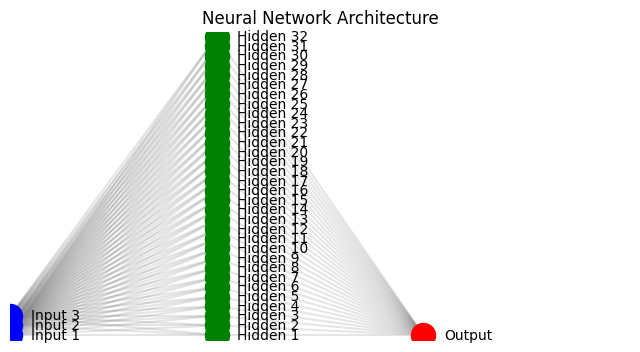


Training With Alpha: 0.001
Error after 0 iterations: 0.49643992250078794
Error after 10000 iterations: 0.49104946812904954
Error after 20000 iterations: 0.4849763070274596
Error after 30000 iterations: 0.4778306787926556
Error after 40000 iterations: 0.4690384653902825
Error after 50000 iterations: 0.4580292585652751

Training With Alpha: 0.01
Error after 0 iterations: 0.49643992250078794
Error after 10000 iterations: 0.3563790616480213
Error after 20000 iterations: 0.14693984546475988
Error after 30000 iterations: 0.08801561274158763
Error after 40000 iterations: 0.06514781927504913
Error after 50000 iterations: 0.05296580870256965

Training With Alpha: 0.1
Error after 0 iterations: 0.49643992250078794
Error after 10000 iterations: 0.03054049083855505
Error after 20000 iterations: 0.019063872533418437
Error after 30000 iterations: 0.014764390729581682
Error after 40000 iterations: 0.01238924299047129
Error after 50000 iterations: 0.010842166973777441

Training With Alpha: 1
Error aft

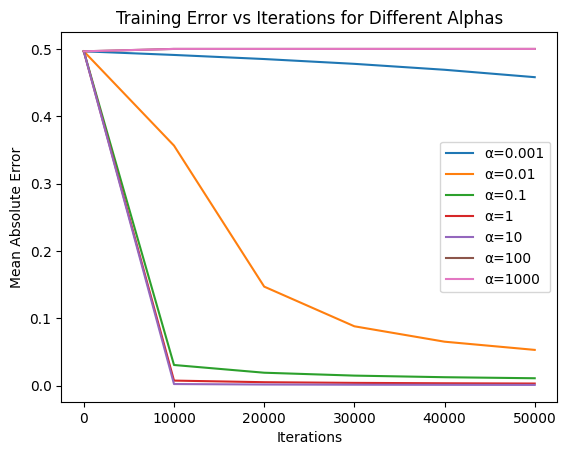

In [15]:
import numpy as np
import matplotlib.pyplot as plt

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
hiddenSize = 32

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_output_to_derivative(output):
    return output * (1 - output)

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Function to draw a simple neural network diagram
def draw_neural_net(input_size, hidden_size, output_size):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlim(0, 3)
    ax.set_ylim(-0.5, max(input_size, hidden_size, output_size)-0.5)
    ax.axis('off')

    # Input layer
    for i in range(input_size):
        ax.scatter(0, i, s=300, color='blue', zorder=5)
        ax.text(0.1, i, f'Input {i+1}', va='center')

    # Hidden layer
    for i in range(hidden_size):
        ax.scatter(1, i, s=300, color='green', zorder=5)
        ax.text(1.1, i, f'Hidden {i+1}', va='center')

    # Output layer
    for i in range(output_size):
        ax.scatter(2, i, s=300, color='red', zorder=5)
        ax.text(2.1, i, 'Output', va='center')

    # Connect input to hidden
    for i in range(input_size):
        for j in range(hidden_size):
            ax.plot([0, 1], [i, j], color='gray', alpha=0.2)

    # Connect hidden to output
    for i in range(hidden_size):
        for j in range(output_size):
            ax.plot([1, 2], [i, j], color='gray', alpha=0.2)

    ax.set_title('Neural Network Architecture')
    plt.show()

draw_neural_net(3, hiddenSize, 1)

for alpha in alphas:
    print("\nTraining With Alpha:", alpha)
    np.random.seed(1)

    synapse_0 = 2 * np.random.random((3, hiddenSize)) - 1
    synapse_1 = 2 * np.random.random((hiddenSize, 1)) - 1

    errors = []
    for j in range(60000):
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0, synapse_0))
        layer_2 = sigmoid(np.dot(layer_1, synapse_1))

        layer_2_error = layer_2 - y
        if j % 10000 == 0:
            error = np.mean(np.abs(layer_2_error))
            print("Error after", j, "iterations:", error)
            errors.append(error)

        layer_2_delta = layer_2_error * sigmoid_output_to_derivative(layer_2)
        layer_1_error = layer_2_delta.dot(synapse_1.T)
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)

        synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
        synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))

    # Plot error per 10,000 iterations for this alpha
    plt.plot(range(0, 60000, 10000), errors, label=f'α={alpha}')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Absolute Error')
    plt.title('Training Error vs Iterations for Different Alphas')
    plt.legend()

plt.show()


In [7]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_output_to_derivative(output):
    return output * (1 - output)

# Input dataset
X = np.array([
    [0, 1],
    [0, 1],
    [1, 0],
    [1, 0]
])

# Output dataset
y = np.array([[0, 0, 1, 1]]).T

# Seed random numbers for reproducibility
np.random.seed(1)

# Initialize weights randomly with mean 0
synapse_0 = 2 * np.random.random((2, 1)) - 1

for iter in range(10000):  # Changed xrange to range for Python 3

    # Forward propagation
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0, synapse_0))

    # Error calculation
    layer_1_error = layer_1 - y

    # Delta calculation
    layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)
    synapse_0_derivative = np.dot(layer_0.T, layer_1_delta)

    # Update weights
    synapse_0 -= synapse_0_derivative

print("Output After Training:")
print(layer_1)


Output After Training:
[[0.00505119]
 [0.00505119]
 [0.99494905]
 [0.99494905]]


In [8]:
import numpy as np

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_output_to_derivative(output):
    return output * (1 - output)

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

for alpha in alphas:
    print("\nTraining With Alpha:", alpha)
    np.random.seed(1)

    synapse_0 = 2 * np.random.random((3, 4)) - 1
    synapse_1 = 2 * np.random.random((4, 1)) - 1

    for j in range(60000):  # Changed xrange to range for Python 3

        # Feed forward
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0, synapse_0))
        layer_2 = sigmoid(np.dot(layer_1, synapse_1))

        # Error
        layer_2_error = layer_2 - y

        if j % 10000 == 0:
            print("Error after", j, "iterations:", np.mean(np.abs(layer_2_error)))

        # Backpropagation
        layer_2_delta = layer_2_error * sigmoid_output_to_derivative(layer_2)
        layer_1_error = layer_2_delta.dot(synapse_1.T)
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)

        # Update weights
        synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
        synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))



Training With Alpha: 0.001
Error after 0 iterations: 0.4964100319027255
Error after 10000 iterations: 0.49516402549338606
Error after 20000 iterations: 0.4935960431880486
Error after 30000 iterations: 0.4916063585594306
Error after 40000 iterations: 0.48910016654420474
Error after 50000 iterations: 0.48597785784615843

Training With Alpha: 0.01
Error after 0 iterations: 0.4964100319027255
Error after 10000 iterations: 0.45743107444190134
Error after 20000 iterations: 0.35909720256339905
Error after 30000 iterations: 0.2393581371589725
Error after 40000 iterations: 0.14307065901337035
Error after 50000 iterations: 0.09859642980892713

Training With Alpha: 0.1
Error after 0 iterations: 0.4964100319027255
Error after 10000 iterations: 0.042888017000115755
Error after 20000 iterations: 0.02409899422852161
Error after 30000 iterations: 0.018110652146797853
Error after 40000 iterations: 0.014987616272210909
Error after 50000 iterations: 0.013014490538142583

Training With Alpha: 1
Error aft

In [10]:
import numpy as np

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_output_to_derivative(output):
    return output * (1 - output)

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

for alpha in alphas:
    print("\nTraining With Alpha:", alpha)
    np.random.seed(1)

    # Randomly initialize our weights with mean 0
    synapse_0 = 2 * np.random.random((3, 4)) - 1
    synapse_1 = 2 * np.random.random((4, 1)) - 1

    prev_synapse_0_weight_update = np.zeros_like(synapse_0)
    prev_synapse_1_weight_update = np.zeros_like(synapse_1)

    synapse_0_direction_count = np.zeros_like(synapse_0)
    synapse_1_direction_count = np.zeros_like(synapse_1)

    for j in range(60000):  # Changed xrange to range for Python 3

        # Feed forward through layers 0, 1, and 2
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0, synapse_0))
        layer_2 = sigmoid(np.dot(layer_1, synapse_1))

        # How much did we miss the target value?
        layer_2_error = y - layer_2

        if j % 10000 == 0:
            print("Error:", np.mean(np.abs(layer_2_error)))

        # In what direction is the target value?
        # Were we really sure? If so, don't change too much.
        layer_2_delta = layer_2_error * sigmoid_output_to_derivative(layer_2)

        # How much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)

        # In what direction is the target l1?
        # Were we really sure? If so, don't change too much.
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)

        synapse_1_weight_update = layer_1.T.dot(layer_2_delta)
        synapse_0_weight_update = layer_0.T.dot(layer_1_delta)

        if j > 0:
            # Count the number of times the update direction changes
            synapse_0_direction_count += np.abs(
                ((synapse_0_weight_update > 0) + 0) - ((prev_synapse_0_weight_update > 0) + 0)
            )
            synapse_1_direction_count += np.abs(
                ((synapse_1_weight_update > 0) + 0) - ((prev_synapse_1_weight_update > 0) + 0)
            )

        synapse_1 += alpha * synapse_1_weight_update
        synapse_0 += alpha * synapse_0_weight_update

        prev_synapse_0_weight_update = synapse_0_weight_update
        prev_synapse_1_weight_update = synapse_1_weight_update

    print("Synapse 0")
    print(synapse_0)

    print("Synapse 0 Update Direction Changes")
    print(synapse_0_direction_count)

    print("Synapse 1")
    print(synapse_1)

    print("Synapse 1 Update Direction Changes")
    print(synapse_1_direction_count)



Training With Alpha: 0.001
Error: 0.4964100319027255
Error: 0.49516402549338606
Error: 0.4935960431880486
Error: 0.4916063585594306
Error: 0.48910016654420474
Error: 0.48597785784615843
Synapse 0
[[-0.28448441  0.32471214 -1.53496167 -0.47594822]
 [-0.7550616  -1.04593014 -1.45446052 -0.32606771]
 [-0.2594825  -0.13487028 -0.29722666  0.40028038]]
Synapse 0 Update Direction Changes
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]]
Synapse 1
[[-0.61957526]
 [ 0.76414675]
 [-1.49797046]
 [ 0.40734574]]
Synapse 1 Update Direction Changes
[[1.]
 [1.]
 [0.]
 [1.]]

Training With Alpha: 0.01
Error: 0.4964100319027255
Error: 0.45743107444190134
Error: 0.35909720256339905
Error: 0.2393581371589725
Error: 0.14307065901337035
Error: 0.09859642980892713
Synapse 0
[[ 2.39225985  2.56885428 -5.38289334 -3.29231397]
 [-0.35379718 -4.6509363  -5.67005693 -1.74287864]
 [-0.15431323 -1.17147894  1.97979367  3.44633281]]
Synapse 0 Update Direction Changes
[[1. 1. 0. 0.]
 [2. 0. 0. 2.]
 [4. 2. 1. 1.]]
Synap

In [11]:
import numpy as np

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
hiddenSize = 32

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_output_to_derivative(output):
    return output * (1 - output)

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

for alpha in alphas:
    print("\nTraining With Alpha:", alpha)
    np.random.seed(1)

    # Randomly initialize our weights with mean 0
    synapse_0 = 2 * np.random.random((3, hiddenSize)) - 1
    synapse_1 = 2 * np.random.random((hiddenSize, 1)) - 1

    for j in range(60000):  # Changed xrange to range for Python 3

        # Feed forward through layers 0, 1, and 2
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0, synapse_0))
        layer_2 = sigmoid(np.dot(layer_1, synapse_1))

        # How much did we miss the target value?
        layer_2_error = layer_2 - y

        if j % 10000 == 0:
            print("Error after", j, "iterations:", np.mean(np.abs(layer_2_error)))

        # In what direction is the target value?
        # Were we really sure? If so, don't change too much.
        layer_2_delta = layer_2_error * sigmoid_output_to_derivative(layer_2)

        # How much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)

        # In what direction is the target l1?
        # Were we really sure? If so, don't change too much.
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)

        synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
        synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))



Training With Alpha: 0.001
Error after 0 iterations: 0.49643992250078794
Error after 10000 iterations: 0.49104946812904954
Error after 20000 iterations: 0.4849763070274596
Error after 30000 iterations: 0.4778306787926556
Error after 40000 iterations: 0.4690384653902825
Error after 50000 iterations: 0.4580292585652751

Training With Alpha: 0.01
Error after 0 iterations: 0.49643992250078794
Error after 10000 iterations: 0.3563790616480213
Error after 20000 iterations: 0.14693984546475988
Error after 30000 iterations: 0.08801561274158763
Error after 40000 iterations: 0.06514781927504913
Error after 50000 iterations: 0.05296580870256965

Training With Alpha: 0.1
Error after 0 iterations: 0.49643992250078794
Error after 10000 iterations: 0.03054049083855505
Error after 20000 iterations: 0.019063872533418437
Error after 30000 iterations: 0.014764390729581682
Error after 40000 iterations: 0.01238924299047129
Error after 50000 iterations: 0.010842166973777441

Training With Alpha: 1
Error aft

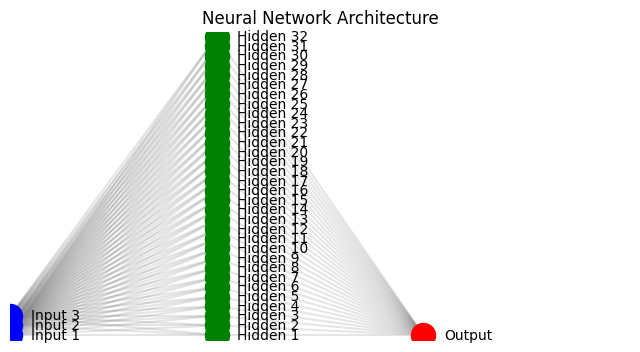


Training With Alpha: 0.001
Error after 0 iterations: 0.49643992250078794
Error after 10000 iterations: 0.49104946812904954
Error after 20000 iterations: 0.4849763070274596
Error after 30000 iterations: 0.4778306787926556
Error after 40000 iterations: 0.4690384653902825
Error after 50000 iterations: 0.4580292585652751

Training With Alpha: 0.01
Error after 0 iterations: 0.49643992250078794
Error after 10000 iterations: 0.3563790616480213
Error after 20000 iterations: 0.14693984546475988
Error after 30000 iterations: 0.08801561274158763
Error after 40000 iterations: 0.06514781927504913
Error after 50000 iterations: 0.05296580870256965

Training With Alpha: 0.1
Error after 0 iterations: 0.49643992250078794
Error after 10000 iterations: 0.03054049083855505
Error after 20000 iterations: 0.019063872533418437
Error after 30000 iterations: 0.014764390729581682
Error after 40000 iterations: 0.01238924299047129
Error after 50000 iterations: 0.010842166973777441

Training With Alpha: 1
Error aft

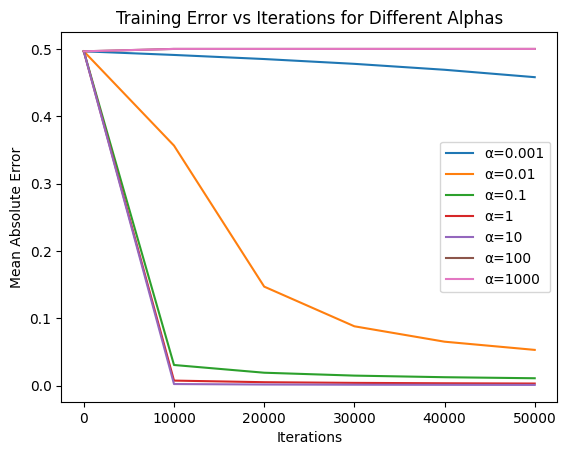

In [12]:
import numpy as np
import matplotlib.pyplot as plt

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
hiddenSize = 32

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_output_to_derivative(output):
    return output * (1 - output)

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Function to draw a simple neural network diagram
def draw_neural_net(input_size, hidden_size, output_size):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlim(0, 3)
    ax.set_ylim(-0.5, max(input_size, hidden_size, output_size)-0.5)
    ax.axis('off')

    # Input layer
    for i in range(input_size):
        ax.scatter(0, i, s=300, color='blue', zorder=5)
        ax.text(0.1, i, f'Input {i+1}', va='center')

    # Hidden layer
    for i in range(hidden_size):
        ax.scatter(1, i, s=300, color='green', zorder=5)
        ax.text(1.1, i, f'Hidden {i+1}', va='center')

    # Output layer
    for i in range(output_size):
        ax.scatter(2, i, s=300, color='red', zorder=5)
        ax.text(2.1, i, 'Output', va='center')

    # Connect input to hidden
    for i in range(input_size):
        for j in range(hidden_size):
            ax.plot([0, 1], [i, j], color='gray', alpha=0.2)

    # Connect hidden to output
    for i in range(hidden_size):
        for j in range(output_size):
            ax.plot([1, 2], [i, j], color='gray', alpha=0.2)

    ax.set_title('Neural Network Architecture')
    plt.show()

draw_neural_net(3, hiddenSize, 1)

for alpha in alphas:
    print("\nTraining With Alpha:", alpha)
    np.random.seed(1)

    synapse_0 = 2 * np.random.random((3, hiddenSize)) - 1
    synapse_1 = 2 * np.random.random((hiddenSize, 1)) - 1

    errors = []
    for j in range(60000):
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0, synapse_0))
        layer_2 = sigmoid(np.dot(layer_1, synapse_1))

        layer_2_error = layer_2 - y
        if j % 10000 == 0:
            error = np.mean(np.abs(layer_2_error))
            print("Error after", j, "iterations:", error)
            errors.append(error)

        layer_2_delta = layer_2_error * sigmoid_output_to_derivative(layer_2)
        layer_1_error = layer_2_delta.dot(synapse_1.T)
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)

        synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
        synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))

    # Plot error per 10,000 iterations for this alpha
    plt.plot(range(0, 60000, 10000), errors, label=f'α={alpha}')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Absolute Error')
    plt.title('Training Error vs Iterations for Different Alphas')
    plt.legend()

plt.show()
